In [191]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [199]:
df = pd.read_csv('116_medians.csv', header = None)

In [200]:
df[0] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in df[0].values]
date_list = np.sort(list(dict.fromkeys(df[0].values)))
time_list = np.array(np.arange(0, 85), dtype = int)
Q1 = df[2].values
median = df[3].values
Q3 = df[4].values

In [202]:
ear_df = pd.read_csv('eartmp.csv', header = None)
ear_df[0] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in ear_df[0].values]
ear_df[1] = [datetime.datetime.strptime(i, '%H:%M').time() for i in ear_df[1].values]
ear_df[1] = [np.floor((datetime.datetime.combine((ear_df[0].values)[i], (ear_df[1].values)[i])-datetime.datetime.combine((ear_df[0].values)[i], datetime.time(8,0)))/datetime.timedelta(minutes = 10)) for i in range(len(ear_df[0].values))]
ear_date = np.sort(list(dict.fromkeys(ear_df[0].values)))
ear_time = ear_df[1].values
ear_temp = ear_df[2].values

In [205]:
ear_filter = (ear_temp>37.5)&(ear_time<=85)
risk_array = [(ear_df[0].values)[ear_filter], ear_time[ear_filter], ear_temp[ear_filter]]

In [206]:
risk_array

[array([datetime.date(2020, 1, 24), datetime.date(2020, 1, 25),
        datetime.date(2020, 1, 26)], dtype=object),
 array([ 6., 75., 30.]),
 array([38.1, 38.6, 37.8])]

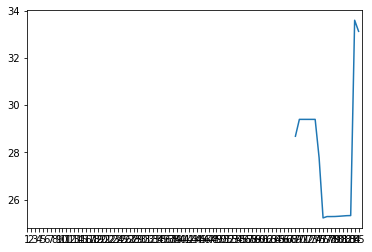

6.0 38.1


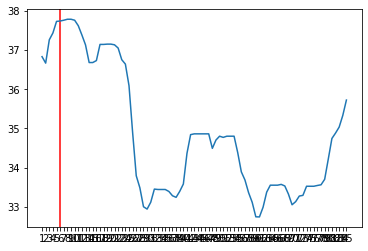

75.0 38.6


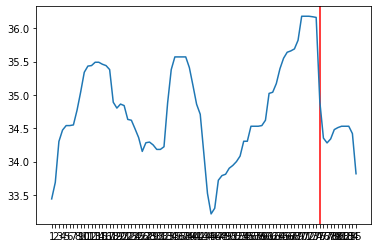

30.0 37.8


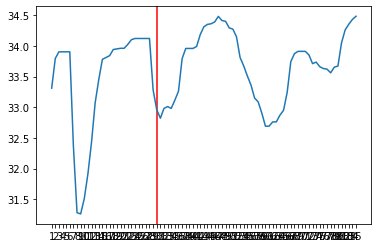

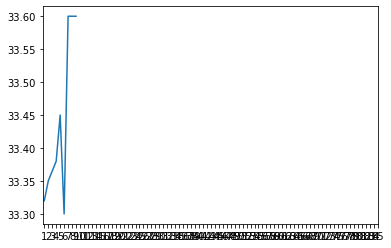

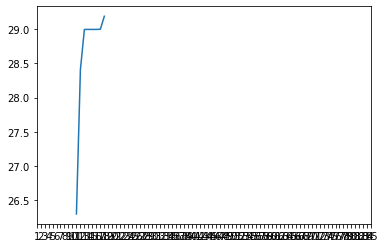

In [308]:
for date in range(len(date_list)):
    d_filter = time_list+85*(date)
    
    daily_Q1 = Q1[d_filter]
    daily_Q3 = Q3[d_filter]
    daily_median = median[d_filter]
    
    ear_daily_filter = (risk_array[0] == date_list[date])
    for i in range(len(risk_array[1][ear_daily_filter])):
        print((risk_array[1][ear_daily_filter])[i],(risk_array[2][ear_daily_filter])[i])
        plt.axvline(x = risk_array[1][ear_daily_filter][i], c = 'r')
        
    
    plt.plot( time_list+1, daily_median)
#     plt.plot( time_list+1, daily_Q3)
#     plt.plot( time_list+1, daily_median)
    plt.xticks(time_list+1)
    plt.show()

In [223]:
date_list[2]

datetime.date(2020, 1, 25)

[24.]
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 33.59 33.71 33.69] 24
[33.59 3

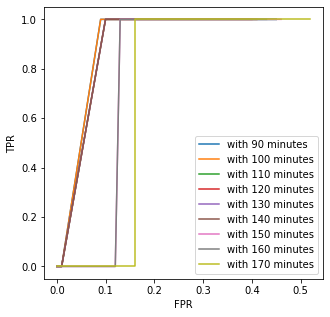

In [301]:
data_filter = date_list[1:3]
# find_increasing_interval(Q1[time_list+28*(2)], time_list)
result = []
for day in range(3,4):
    d_Q1 = Q1[time_list+85*(day)]
    d_Q3 = Q3[time_list+85*(day)]
    d_med = median[time_list+85*(day)]
    target = risk_array[1][risk_array[0] == date_list[day]]-6 # time
    print(target)
    
    temp_cri_list = np.linspace(30, 36, 61)
    plt.figure(figsize = (5,5))
    for time_cri in range(4,18):
        classify_result = []
        for temp_cri in temp_cri_list:
            TP = 0
            TN = 0
            FP = 0
            FN = 0
            for time in time_list:
                if time >= time_cri:
                    diagonis = upper_identify(d_Q1[time-time_cri:time], temp_cri, r=0.5) & increasing_identify(d_Q1[time-time_cri:time], r=0.5)
                    if (diagonis == True) & (time in target):
                        TP += 1
                    elif (diagonis == True) & (time not in target):
                        FP += 1
                    elif (diagonis == False) & (time not in target):
                        TN += 1
                    elif (diagonis == False) & (time in target):
                        print(d_Q1[time-time_cri:time], time)
                        FN += 1
            print('==========')
            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            ACC = (TP + TN) / ((TP+FN) + (FP + TN))
            c = [time_cri, temp_cri]
            classify_result.append([TPR, round(FPR,2), round(ACC,2), round(np.sqrt((TPR-1)**2+FPR**2),2), c])
            result.append([TPR, round(FPR,2), round(ACC,2), round(np.sqrt((TPR-1)**2+FPR**2),2), c])
        if np.sum(np.array(classify_result)[:,0] != 0):
            plt.plot(np.array(classify_result)[:,1],np.array(classify_result)[:,0], label = 'with '+str(time_cri*10)+' minutes')
            plt.xlabel("FPR")
            plt.ylabel("TPR")
            plt.legend()
    plt.show()

In [299]:
np.array(result)[(np.array(result)[:,0] > 0) & (np.array(result)[:,0] < 1)]

array([], shape=(0, 5), dtype=object)

In [ ]:
result = []
    temp_cri_list = np.linspace(32, 36, 41)
    plt.figure(figsize = (5,5))
    for time_cri in range(4,18):
        classify_result = []
        for temp_cri in temp_cri_list:
            TP = 0
            TN = 0
            FP = 0
            FN = 0
            for time in time_list:
                if time >= time_cri:
                    diagonis = upper_identify(d_Q1[time-time_cri:time], temp_cri, r=0.7) & increasing_identify(d_Q1[time-time_cri:time], r=0.5)
                    if (diagonis == True) & (time in target):
                        TP += 1
                    elif (diagonis == True) & (time not in target):
                        FP += 1
                    elif (diagonis == False) & (time not in target):
                        TN += 1
                    elif (diagonis == False) & (time in target):
                        FN += 1
            TPR = TP / (TP+FN)
            FPR = FP / (FP + TN)
            ACC = (TP + TN) / ((TP+FN) + (FP + TN))
            c = [time_cri, temp_cri]
            classify_result.append([round(TPR,5), round(FPR,2), round(ACC,2), round(np.sqrt((TPR-1)**2+FPR**2),2), c])
            result.append([round(TPR,5), round(FPR,2), round(ACC,2), round(np.sqrt((TPR-1)**2+FPR**2),2), c])
        if np.sum(np.array(classify_result)[:,0] != 0):
            plt.plot(np.array(classify_result)[:,1],np.array(classify_result)[:,0], label = 'with '+str(time_cri*10)+' minutes')
            plt.xlabel("FPR")
            plt.ylabel("TPR")
            plt.legend()
    plt.show()

In [237]:
Q1[time_list+28*(2)][0:9]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [277]:
def increasing_identify(data, r = 0.5):
    increasing = np.array([data[i+1]>data[i] for i in range(len(data)-1)], dtype = int)
#     print(increasing)
    if (np.sum(increasing) >= r*(len(data)-1)):
        return 1
    else:
        return 0
def upper_identify(data, cri, r = 0.5):
    upper = np.array(data>cri, dtype = int) 
    if (np.sum(upper) >= r*(len(data))):
        return 1
    else:
        return 0
# def find_increasing_interval(data, time):
#     interval = []
    
#     for data_idx in range(1,len(data)-1):
#         if len(interval) ==  0:
#             start = 0
#         if (data[data_idx+1] < data[data_idx]) & (time[data_idx]>start) & (data[data_idx-1] < data[data_idx]):
#             interval.append([start, time[data_idx]])
#         else:
#             continue
#         start = interval[-1][-1]+1 
#     return interval

In [159]:
# a = [1,2,3,4,5,2,3,5,2,1,1]
# increasing_identify(a)&upper_identify()
1&0

0

In [150]:
upper_identify(np.linspace(32, 35, 16),34)

0